# Vegan Restaraunt Yelp Data

This project explores Yelp review data from (see class notes on data source), with the specific intent of understanding the landscape of vegan restaraunts, their performances, and their locations. 

NOTE: Restaraunt data is accurate but incomplete. The data is NOT a fully representative sample of U.S. restaraunts on Yelp!!!

### Data set-up & wrangling

In [63]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# importing csv files
rev = pd.read_csv('reviews.csv')
res = pd.read_csv('restaurants.csv')

In [5]:
rev.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date
0,0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30
1,1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2.0,2015-09-10 02:41:13
2,2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5.0,2017-08-18 01:42:46
3,3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5.0,2015-09-26 16:13:09
4,4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3.0,2015-06-22 16:08:27


In [6]:
res.head()

,Unnamed: 0,business_id,name,city,state,categories
0,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau..."
1,18,mcr1lAEdvGLMJhuPwI3I2A,101 Taiwanese Cuisine,Reno,NV,"Food, Restaurants, Chinese, Bubble Tea, Taiwanese"
2,20,iteoJ5b-zJHwkIqJsljrSQ,10th Street Baking,Belleville,IL,"Restaurants, Bakeries, Food"
3,27,HxU-aiv_9aqwiqYdXeEj1g,12 South Bistro,Nashville,TN,"Restaurants, Bistros, Italian"
4,29,H-cNdJ7CGHHu0iZZ729NKg,120 West Bar & Grill,Indianapolis,IN,"Food, Hotels & Travel, Restaurants, Hotels, Am..."


In [7]:
# data wrangling: join on business_id
reviews = pd.merge(rev, res, how='left', on='business_id')
reviews.head()

,Unnamed: 0_x,review_id,user_id,business_id,stars,date,Unnamed: 0_y,name,city,state,categories
0,0,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,2014-02-05 20:30:30,12038,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch"
1,1,oUrKJzj_qZybqqPatE9q1A,n33TJBR6BPLrkOZiOdXLVg,YjUWPpI6HXG530lwP-fb2A,2.0,2015-09-10 02:41:13,12038,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch"
2,2,E21dO10aI0pXCuoDNeSY6A,d3Jj46Fvsx9AT0f6z8NQcw,YjUWPpI6HXG530lwP-fb2A,5.0,2017-08-18 01:42:46,12038,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch"
3,3,7pn3auavTDZyDKlAAku1Og,aOGtShQrhkVF0REtkJCNkA,YjUWPpI6HXG530lwP-fb2A,5.0,2015-09-26 16:13:09,12038,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch"
4,4,Izs72sMY0cCXtHs5exObZw,-rGU3wo4fgEnGRboYdMTjw,YjUWPpI6HXG530lwP-fb2A,3.0,2015-06-22 16:08:27,12038,Kettle Restaurant,Tucson,AZ,"Restaurants, Breakfast & Brunch"


### Finding vegan restaraunts

In [9]:
vegan_revs = reviews[reviews['categories'].notna() & reviews['categories'].str.contains('Vegan')]
vegan_revs.head()

,Unnamed: 0_x,review_id,user_id,business_id,stars,date,Unnamed: 0_y,name,city,state,categories
28713,28713,TbikcUbqg1ku2H69GqZnLA,LAvUtr0ks8BnJJyVuOiDEg,EERwPZdemE21aIwYsadjTg,3.0,2015-06-08 18:05:24,15298,Mirko Pasta,Nashville,TN,"Cafes, Vegan, Vegetarian, Restaurants, Special..."
28714,28714,An87uIdcXLQ5ORwIl3FFEA,7_qVIgvq4Cdxnkc7jiOU-A,EERwPZdemE21aIwYsadjTg,5.0,2014-07-14 01:01:25,15298,Mirko Pasta,Nashville,TN,"Cafes, Vegan, Vegetarian, Restaurants, Special..."
28715,28715,AM6OoMlzRkdqqdK7xQRyog,s6OW87ooS1pLs2csEIGS6w,EERwPZdemE21aIwYsadjTg,5.0,2018-05-19 02:00:30,15298,Mirko Pasta,Nashville,TN,"Cafes, Vegan, Vegetarian, Restaurants, Special..."
28716,28716,CDIo2xZMvccsJwpVUJbxfQ,ruHAPbAvNDx6ykR2SCUtdA,EERwPZdemE21aIwYsadjTg,5.0,2017-03-04 01:39:49,15298,Mirko Pasta,Nashville,TN,"Cafes, Vegan, Vegetarian, Restaurants, Special..."
28717,28717,rVEXMjyzWHwTnN4Abu6-hw,phS9wbcMIZ4NgTGlFoYQog,EERwPZdemE21aIwYsadjTg,4.0,2018-05-29 12:57:08,15298,Mirko Pasta,Nashville,TN,"Cafes, Vegan, Vegetarian, Restaurants, Special..."


In [10]:
vegan_res_ids = vegan_revs['business_id'].unique()
vegan_res_ids

array(['EERwPZdemE21aIwYsadjTg', '3OGzmGqWwsyGLkhnxrA9Pw',
       'faSi7EoZ38xMPJEpp7-pqg', 'qraJJmAsz8cALLRegqiChw',
       '0gdnntqYGYhUCTTf0a7Xcg', 'lM20OuidM_XjYIvoxSsGew',
       'jfbJr7k3m-tB_zy141Kn0Q', 'aiThB016Yk5mcauVKtSpNA',
       'T2tJmH2BWNCkzdTYc4W3cA', 'Reuk1p7ZUrLikUjzv70jYA',
       'jRaBuPn1YNfze55LcBCM0g', '0vfmJXYVLZAMpUuNJx6ejw',
       'Cch7lpybfh4V0_1j8Nr3yQ', 'JL6U8xzmWZJgVTZy6S4rsQ',
       'kllzL60MYGNpjsdPZeMZSg', 'REiAM73RkOxFqCVlEFiRWA',
       'F3Tl6J6d6XVR04eL4mjgPA', 'M6ap9LXMEZmHf6NhlNpDQA',
       'rs2OZH_vIKgW2Zk59OnZ2A', 'DeSsx9UMrU3tfedZbZfCag',
       'b8zYL8751HJXc0XlUw5K3g', 'SFuedHlHzZAl_0SY75507A',
       '_34KJPR-T0HP9USJw1nCfw', 'qck6waU6WlXBesRKmtsWfg',
       'j7LZM6rf4Bf33exo6XXKGA', 'pFwBaG-6kvrGgSRfIhgPKQ',
       'FpYZBwVw_zdA5rfSRw4utw', 'b2NYyx-BqwNHgOC5RnXzmw',
       'QU3cET055Ewld3x_bxEtqw', 'wU2yYCoGq1iK2ILZ0dPMzw',
       'UjtAPcznFK2ujyjAK1n_kQ', 'ZwRM2qsGJT_fkQx_MDZF8g',
       'lWPQeVAZInbNntRu6eFkbg', 'RLRTakpA-jtBsurYHjZRRQ

In [11]:
len(vegan_res_ids)

50

In [12]:
### FROM CHAT GPT 

vegan_revs_grouped = (
    vegan_revs[['stars', 'business_id']]
    .groupby(['business_id'])
    .agg(['mean', 'count'])
)

# Flatten column names
vegan_revs_grouped.columns = ['_'.join(col).strip() for col in vegan_revs_grouped.columns.to_flat_index()]

# Reset index if needed
vegan_revs_grouped = vegan_revs_grouped.reset_index()

### END GPT CODE 

vegan_res = pd.merge(vegan_revs_grouped, res)
vegan_res = vegan_res.drop('Unnamed: 0', axis=1)
vegan_res

,business_id,stars_mean,stars_count,name,city,state,categories
0,0gdnntqYGYhUCTTf0a7Xcg,4.575758,33,Tumerico On 4th Ave,Tucson,AZ,"Mexican, Vegetarian, Vegan, Restaurants"
1,0vfmJXYVLZAMpUuNJx6ejw,4.280000,25,Grindcore House,Philadelphia,PA,"Food, Vegan, Sandwiches, Bakeries, Restaurants..."
2,3OGzmGqWwsyGLkhnxrA9Pw,3.864583,192,Gourmet Pizza Company,Tampa,FL,"Pizza, Restaurants, Gluten-Free, Vegan"
3,4nr-pXYTCYFZyVEihV2BAw,4.107143,28,Farmacy Vegan Kitchen + Bakery,Tampa,FL,"Food, Vegan, Bakeries, Breakfast & Brunch, Res..."
4,9A5Gw0At6so0x-vWM0_JZw,4.495677,347,Grindcore House,Philadelphia,PA,"Coffee & Tea, Vegetarian, Food, Restaurants, V..."
5,Cch7lpybfh4V0_1j8Nr3yQ,4.692308,13,WeVegan Cafe,Tampa,FL,"Cafes, Coffee & Tea, Restaurants, Bakeries, Fo..."
6,DeSsx9UMrU3tfedZbZfCag,4.777778,27,Veghada,Philadelphia,PA,"Food, Restaurants, Vegan, Vegetarian, Specialt..."
7,EERwPZdemE21aIwYsadjTg,3.916667,312,Mirko Pasta,Nashville,TN,"Cafes, Vegan, Vegetarian, Restaurants, Special..."
8,F3Tl6J6d6XVR04eL4mjgPA,4.544304,79,Love Again Local,West Chester,PA,"Food, Bakeries, Restaurants, Sandwiches, Delis..."
9,FLtru6J7y9d-Rqb32jyPIg,4.733333,30,The Fat Falafel,New Orleans,LA,"Restaurants, Middle Eastern, Vegan, Food, Food..."


In [13]:
vegan_res.describe()

,stars_mean,stars_count
count,50.000000,50.000000
mean,4.350357,140.620000
std,0.414591,194.758866
min,2.974359,5.000000
25%,4.068744,28.250000
50%,4.369142,56.000000
75%,4.685897,174.000000
max,5.000000,1018.000000


In [14]:
vegan_res['name'].value_counts()

name
Grindcore House                            2
Black Leaf Vegan                           1
Saffron The Indian Kitchen                 1
Akar                                       1
Hiro Ramen House                           1
Jamaicaway Restaurant & Catering           1
Original Thought                           1
Taco & Ramen                               1
Love At First Bite                         1
Algorithm Restaurants                      1
Drop Squad Kitchen                         1
Roots Zero Waste Market                    1
Tumerico On 4th Ave                        1
Noodlebox                                  1
Ybor City Vegan Deli                       1
Noble Pie Parlor - Summit Reno             1
Louisiana Pizza Kitchen                    1
Gangster Vegan Organics                    1
Yogorino                                   1
Kaldi's Coffee Roasting Company            1
Savory Leaf Cafe                           1
Falcon Coffee Bar                          1
615 C

### Restaraunt Category information

In [16]:
# combine the categories 
cat_comb = ', '.join(vegan_res['categories'])
# Split the string into a list of phrases
categories = [phrase.strip() for phrase in cat_comb.split(",")]

# Use Pandas to count occurrences
cat_counts = pd.DataFrame(pd.Series(categories).value_counts()).reset_index(names = 'category')

cat_counts[cat_counts['count']>1]

,category,count
0,Vegan,50
1,Restaurants,50
2,Food,28
3,Vegetarian,24
4,Coffee & Tea,8
5,Sandwiches,7
6,Juice Bars & Smoothies,7
7,Specialty Food,6
8,Cafes,6
9,Mexican,5


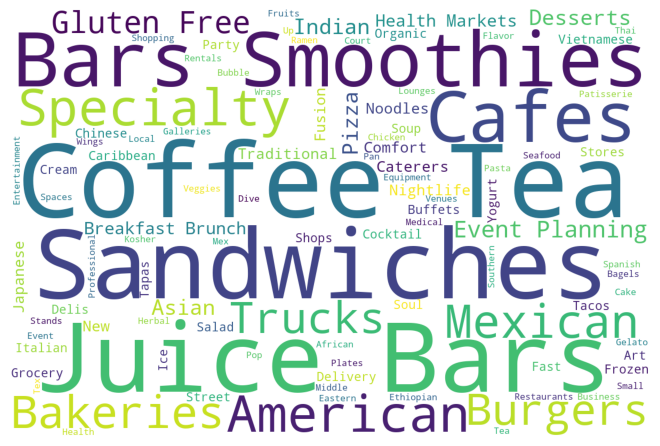

In [187]:
category_names = ''
filter_cats = cat_counts[cat_counts['count']>20]['category'].tolist()
for cat in categories:
    if cat not in filter_cats:
        category_names += ' ' + cat

wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                stopwords = ['Food', 'Services', 'Vendors', 'Shop', 'Consulting'],
                min_font_size = 10).generate(category_names)

# plot the WordCloud image                       
plt.figure(facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [189]:
wordcloud.to_file("v_categories_wc.png")

### Restaraunt Location information

In [18]:
vegan_res['location'] = vegan_res['city'] + ', ' + vegan_res['state']
vegan_location_dist = vegan_res['location'].value_counts()
vegan_location_dist

location
Philadelphia, PA     9
Nashville, TN        8
Tampa, FL            6
New Orleans, LA      3
Edmonton, AB         3
Tucson, AZ           2
Indianapolis, IN     2
St. Louis, MO        2
Saint Ann, MO        1
Clayton, MO          1
Paoli, PA            1
Norristown, PA       1
Reno, NV             1
Garden City, ID      1
Wilmington, DE       1
Greenwood, IN        1
Sherwood Park, AB    1
Boise, ID            1
Clearwater, FL       1
Woodlyn, PA          1
Mount Juliet, TN     1
West Chester, PA     1
Lawrence, NJ         1
Name: count, dtype: int64

In [19]:
vegan_state_dist = vegan_res['state'].value_counts()
vegan_state_dist

state
PA    13
TN     9
FL     7
AB     4
MO     4
LA     3
IN     3
AZ     2
ID     2
DE     1
NV     1
NJ     1
Name: count, dtype: int64

### comparitive performance 

In [21]:
# get non-vegan restaraunts
nv = res[~res['business_id'].isin(vegan_res_ids)]
nv.head()

,Unnamed: 0,business_id,name,city,state,categories
0,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau..."
1,18,mcr1lAEdvGLMJhuPwI3I2A,101 Taiwanese Cuisine,Reno,NV,"Food, Restaurants, Chinese, Bubble Tea, Taiwanese"
2,20,iteoJ5b-zJHwkIqJsljrSQ,10th Street Baking,Belleville,IL,"Restaurants, Bakeries, Food"
3,27,HxU-aiv_9aqwiqYdXeEj1g,12 South Bistro,Nashville,TN,"Restaurants, Bistros, Italian"
4,29,H-cNdJ7CGHHu0iZZ729NKg,120 West Bar & Grill,Indianapolis,IN,"Food, Hotels & Travel, Restaurants, Hotels, Am..."


In [22]:
nv['name'].value_counts()

name
McDonald's                        655
Subway                            381
Taco Bell                         342
Wendy's                           315
Burger King                       305
                                 ... 
Gennaro's Pizza                     1
Generations Pie Company             1
General American Donut Company      1
Geets Diner & Bar                   1
Àrdana Food & Drink                 1
Name: count, Length: 2183, dtype: int64

In [23]:
# get restaraunts with only one location, since almost all in vegan set were only 1 location
nv_names = pd.DataFrame(pd.Series(nv['name']).value_counts()).reset_index(names = 'name')
nv_names_one = nv_names[nv_names['count']==1]
nv_names_one

,name,count
78,Pie12 Napoletana Coal Fired Pizzeria,1
79,Plaza Azteca - Kennett Square,1
80,Pomodoro Pizza,1
81,Pina's Pizza,1
82,Pica's Restaurant,1
...,...,...
2178,Gennaro's Pizza,1
2179,Generations Pie Company,1
2180,General American Donut Company,1
2181,Geets Diner & Bar,1


In [24]:
# get set of those businesses
nv_one = nv[nv['name'].isin(nv_names_one['name'])]
nv_one

,Unnamed: 0,business_id,name,city,state,categories
0,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau..."
1,18,mcr1lAEdvGLMJhuPwI3I2A,101 Taiwanese Cuisine,Reno,NV,"Food, Restaurants, Chinese, Bubble Tea, Taiwanese"
2,20,iteoJ5b-zJHwkIqJsljrSQ,10th Street Baking,Belleville,IL,"Restaurants, Bakeries, Food"
3,27,HxU-aiv_9aqwiqYdXeEj1g,12 South Bistro,Nashville,TN,"Restaurants, Bistros, Italian"
4,29,H-cNdJ7CGHHu0iZZ729NKg,120 West Bar & Grill,Indianapolis,IN,"Food, Hotels & Travel, Restaurants, Hotels, Am..."
...,...,...,...,...,...,...
7404,27663,W7bCZ-AVqO5Uyd9uhObVCg,eHotPot,Tucson,AZ,"Chinese, Taiwanese, Hot Pot, Restaurants"
7405,27664,0jDPdf7kIkjZuNDNVH8Qew,eat.drink.Om...YOGA CAFE,West Chester,PA,"Yoga, Cafes, Fitness & Instruction, Active Lif..."
7406,27723,s9kgpFnusx0hirEYs7L6qQ,nunu,Philadelphia,PA,"Restaurants, Nightlife, Bars, Japanese"
7407,27726,lqjnEMpunyshKpsKa9a66A,opry back porch BBQ,Nashville,TN,"Restaurants, Food Stands"


In [25]:
# filter businesses to match the same cities as vegan subset
nv_one['location'] = nv_one['city'] + ', ' + nv_one['state']
nv_w_location = nv_one[nv_one['location'].isin(pd.DataFrame(vegan_location_dist).reset_index()['location'])]
nv_w_location

/var/folders/ly/jrz1cqr13kg7vq8fv_7ggf5c0000gn/T/ipykernel_10918/3419886161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_one['location'] = nv_one['city'] + ', ' + nv_one['state']


,Unnamed: 0,business_id,name,city,state,categories,location
0,15,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...","New Orleans, LA"
1,18,mcr1lAEdvGLMJhuPwI3I2A,101 Taiwanese Cuisine,Reno,NV,"Food, Restaurants, Chinese, Bubble Tea, Taiwanese","Reno, NV"
3,27,HxU-aiv_9aqwiqYdXeEj1g,12 South Bistro,Nashville,TN,"Restaurants, Bistros, Italian","Nashville, TN"
4,29,H-cNdJ7CGHHu0iZZ729NKg,120 West Bar & Grill,Indianapolis,IN,"Food, Hotels & Travel, Restaurants, Hotels, Am...","Indianapolis, IN"
6,31,83Fw7PpQR9GY-IEokD7mmg,1201 Bar,Philadelphia,PA,"Dive Bars, American (Traditional), Nightlife, ...","Philadelphia, PA"
...,...,...,...,...,...,...,...
7403,27662,Plnxj-bVj4PyOeL3dykGiw,dolce Zola,West Chester,PA,"Desserts, Seafood, Specialty Food, American (N...","West Chester, PA"
7404,27663,W7bCZ-AVqO5Uyd9uhObVCg,eHotPot,Tucson,AZ,"Chinese, Taiwanese, Hot Pot, Restaurants","Tucson, AZ"
7405,27664,0jDPdf7kIkjZuNDNVH8Qew,eat.drink.Om...YOGA CAFE,West Chester,PA,"Yoga, Cafes, Fitness & Instruction, Active Lif...","West Chester, PA"
7406,27723,s9kgpFnusx0hirEYs7L6qQ,nunu,Philadelphia,PA,"Restaurants, Nightlife, Bars, Japanese","Philadelphia, PA"


In [26]:
# filter to only include businesses with same categories as existing vegan restaraunts
v_categories = cat_counts[3:]['category'].str.strip()
nv_w_location = nv_w_location[~nv_w_location['categories'].isna()]
nv_w_cat = nv_w_location[
    nv_w_location['categories'].apply(
        lambda x: any(phrase.strip() in v_categories.tolist() for phrase in x.split(","))
    )
]
nv_w_cat.drop('Unnamed: 0', axis=1, inplace=True)
nv_w_cat

/var/folders/ly/jrz1cqr13kg7vq8fv_7ggf5c0000gn/T/ipykernel_10918/3789819157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_w_cat.drop('Unnamed: 0', axis=1, inplace=True)


,business_id,name,city,state,categories,location
0,cTSczU-9-cYUEM2DlNJcQw,1000 Figs,New Orleans,LA,"Falafel, Mediterranean, Middle Eastern, Restau...","New Orleans, LA"
1,mcr1lAEdvGLMJhuPwI3I2A,101 Taiwanese Cuisine,Reno,NV,"Food, Restaurants, Chinese, Bubble Tea, Taiwanese","Reno, NV"
3,HxU-aiv_9aqwiqYdXeEj1g,12 South Bistro,Nashville,TN,"Restaurants, Bistros, Italian","Nashville, TN"
4,H-cNdJ7CGHHu0iZZ729NKg,120 West Bar & Grill,Indianapolis,IN,"Food, Hotels & Travel, Restaurants, Hotels, Am...","Indianapolis, IN"
6,83Fw7PpQR9GY-IEokD7mmg,1201 Bar,Philadelphia,PA,"Dive Bars, American (Traditional), Nightlife, ...","Philadelphia, PA"
...,...,...,...,...,...,...
7403,Plnxj-bVj4PyOeL3dykGiw,dolce Zola,West Chester,PA,"Desserts, Seafood, Specialty Food, American (N...","West Chester, PA"
7404,W7bCZ-AVqO5Uyd9uhObVCg,eHotPot,Tucson,AZ,"Chinese, Taiwanese, Hot Pot, Restaurants","Tucson, AZ"
7405,0jDPdf7kIkjZuNDNVH8Qew,eat.drink.Om...YOGA CAFE,West Chester,PA,"Yoga, Cafes, Fitness & Instruction, Active Lif...","West Chester, PA"
7406,s9kgpFnusx0hirEYs7L6qQ,nunu,Philadelphia,PA,"Restaurants, Nightlife, Bars, Japanese","Philadelphia, PA"


In [27]:
# get non-vegan reviews 
nv_ids = nv_w_cat['business_id'].unique()

nv_revs = reviews[reviews['business_id'].isin(nv_ids)]

nv_revs_grouped = (
    nv_revs[['stars', 'business_id']]
    .groupby(['business_id'])
    .agg(['mean', 'count'])
)

# Flatten column names
nv_revs_grouped.columns = ['_'.join(col).strip() for col in nv_revs_grouped.columns.to_flat_index()]


# Reset index if needed
nv_revs_grouped = nv_revs_grouped.reset_index()

### END GPT CODE 

nv_res = pd.merge(nv_revs_grouped, res)
nv_res = nv_res.drop('Unnamed: 0', axis=1)
nv_res

,business_id,stars_mean,stars_count,name,city,state,categories
0,-1B9pP_CrRBJYPICE5WbRA,3.808461,851,Spice 28,Philadelphia,PA,"Asian Fusion, Restaurants, American (New), Tha..."
1,-81BXpO5Fuk-RqCabS7LMw,4.138408,289,Big Storm Brewery- Clearwater,Clearwater,FL,"Nightlife, Beer Bar, American (New), Local Fla..."
2,-BPvsLwU9XqGRD275rEpsw,3.565217,23,O'michael's Pub & Grill,Boise,ID,"Nightlife, Irish Pub, American (Traditional), ..."
3,-DGsnMlRrR_tv8avrpQLQw,3.874026,770,Sam's Morning Glory Diner,Philadelphia,PA,"Breakfast & Brunch, Restaurants, Diners"
4,-DlF6neBa1HKx7aFi3ZxOg,4.477273,44,Reinette Cafe & Patisserie,Edmonton,AB,"Coffee & Tea, Cafes, Restaurants, Food, Desserts"
...,...,...,...,...,...,...,...
1019,zlfydjffYAIEj6vsh8tVvQ,3.974576,118,Tino's Pizza,Tucson,AZ,"Italian, Pizza, Restaurants, Salad, Sandwiches"
1020,znmW7djuEJjlMI0hw-utEw,2.737374,99,Red Star Chinese Restaurant,New Orleans,LA,"Latin American, Restaurants, Vegetarian, Diner..."
1021,zvB14002Qi0qZ_DH_DfpLg,4.609756,123,Bon Bon Sushi,West Chester,PA,"Asian Fusion, Japanese, Vegetarian, Seafood, R..."
1022,zxY4DgtXsVHihSUpsmwamg,4.333333,6,P & S Ravioli,Philadelphia,PA,"Food, Do-It-Yourself Food, Restaurants, Italian"


In [28]:
v_stars = vegan_res['stars_mean']
nv_stars = nv_res['stars_mean']

v_stars.describe()

count    50.000000
mean      4.350357
std       0.414591
min       2.974359
25%       4.068744
50%       4.369142
75%       4.685897
max       5.000000
Name: stars_mean, dtype: float64

In [29]:
nv_stars.describe()

count    1024.000000
mean        3.876295
std         0.635998
min         1.250000
25%         3.529134
50%         3.970405
75%         4.333333
max         5.000000
Name: stars_mean, dtype: float64

In [30]:
# t-test to see if there is statistical difference between groups

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(v_stars, nv_stars)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means of the paired samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the paired samples.")

T-Statistic: 5.215503780651206
P-Value: 2.1992023068052336e-07
Reject the null hypothesis: There is a significant difference between the means of the paired samples.


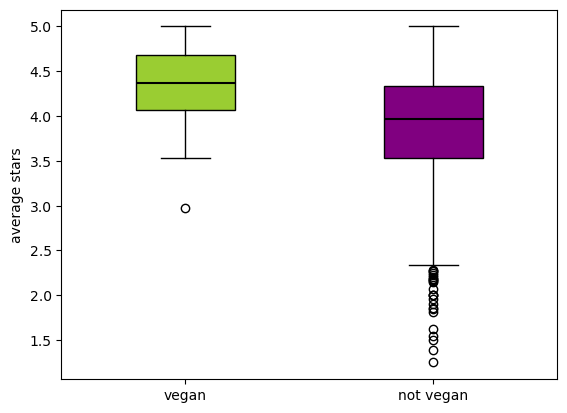

In [207]:
bplot = plt.boxplot(x = [v_stars, nv_stars], patch_artist= True, widths = [.4, 0.4], labels = ['vegan', 'not vegan'])

colors = ['yellowgreen', 'purple']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median in bplot['medians']:
    median.set(color='k', linewidth=1.5)

plt.ylabel('average stars')

plt.show()